# **House price Prediction**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **1. Loading the Dataset** <a id="loading-dataset"></a>

In [2]:
import pandas as pd
df = pd.read_excel("/content/House Price Prediction.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/House Price Prediction.xlsx'

 **1.1 Exploring Dataset** <a id="exploring-dataset"></a>
- Overview of dataset structure.

In [ ]:
df.head()
#print(df.head()) -> string representation

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# concise summary -> Datatypes & Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

We don't have missing values, so we can avoid **"Imputation"** step.

In [ ]:
df.shape

(4600, 18)

We have 4600 rows and 18 columns in this dataset

In [ ]:
# statistical summary of the data
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


**1.2 Checking Null Values** <a id="checking-null-values"></a>
- Identifying missing values in the dataset.

In [ ]:
# check for missing values
df.isnull().sum()
# No missing values

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


**1.3 Checking Duplicate Values** <a id="checking-duplicate-values"></a>
- Identifying duplicate values in the dataset.

In [ ]:
dup = df[df.duplicated()]
dup

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


There are no duplicates in this dataset

# **2. EDA-Visualizing Target Variable** <a id="visualizing-target"></a>

We have various Visualization techniques:
1. Bar Plot: Aggregates of a numerical variable; doesn't count occurences
2. Pie Chart: Distribution of categories; not suitable for higher categories
3. **Histogram: Continuous data; by dividing data into bins**
4. Box Plot: Distribution of numerical variables and its quartiles
5. CountPlot: For categorical data

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

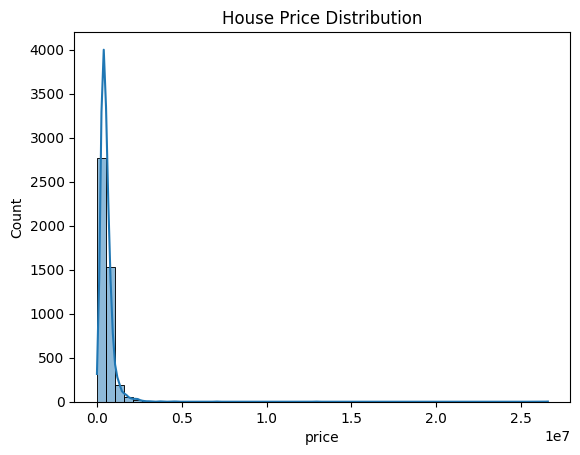

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_target(df, cols):
  sns.histplot(df[cols], bins = 50, kde = True)
  plt.title('House Price Distribution')
  plt.show()

visualize_target(df, 'price')

**huge peak at 0.0 (x-axis)** and **high bars and high density line** suggests
1. outliers causing skew (remove them Using IQR)
2. Skewed distribution (apply log transformation)
3. Range of values too large (Winsorization capping)

**2.1 Checking Summary Statistics of the Data** <a id="summary-statistics"></a>

In [ ]:
import numpy as np

print(df['price'].describe()) # descriptive stats

#checking zero values
print(f"Number of zeros: {sum(df['price'] == 0)}")

# checking skewness
print(f"Skewness: {df['price'].skew():.2f}")

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64
Number of zeros: 49
Skewness: 24.79


1. Right-skewd data: Positvely skewed (right-tail is long
2. Mean > Median = few large values pull mean to right
3. Peak Mode is on the left side
4. If we understand this, we can understand our data and choose right stat model for further analysis
5. Skewd dist -> Normal dist using:



**2.2 Removing Zero Values (Skewed Distribution)** <a id="removing-zero-values"></a>

1. Handling invalid zeros: removing rows with zero prices
2. Original (r,c) - (4600, 18) -> (4551,18)

In [ ]:
df = df[df['price'] > 0]
df.shape

(4551, 18)

We are not imputing values in place of 0s because this can distort the data
eg: [1,2,0,3,0,4,5]
after removing zeros: [1,2,3,4,5]
after imputing zeros with mean (3): [1,2,3,3,3,4,5]
appearing more frequently than it should, distorting true distribution (artificial inflation)
Ultimately, your regression model learns a biased relationship due to these artificial observations, because our goal is to learn relationship b/w variables and predict house price

Skewness is: 25.023817262008482


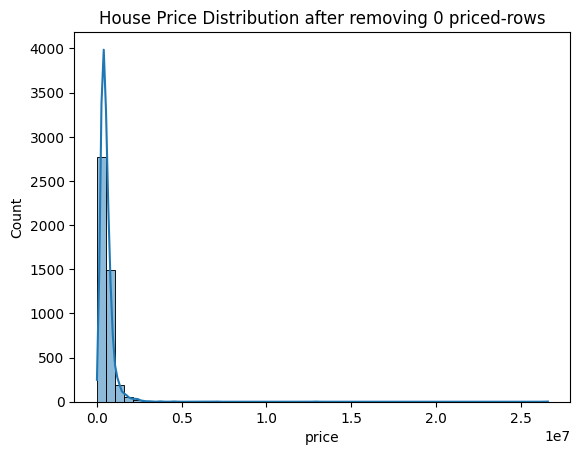

In [ ]:
# plot new distribution after removing 0s

def dist_after_removing_skewness(df, cols):
  sns.histplot(df[cols], bins = 50, kde = True)
  print('Skewness is:', df[cols].skew())

  plt.title('House Price Distribution after removing 0 priced-rows')
  plt.show()

dist_after_removing_skewness(df, 'price')

Skewness increased from **24.79 -> 25.02** indicating "**removed zeroes**" helping to balance distribution slightly. But **extreme values** are dominating the distribution. If we don't cap these extreme values, linear regression makes predictions biased towards high prices.

#**3.Data Pre-processing: Outlier Analysis** <a id="outlier-analysis"></a>

For checking outliers:
1. **Box Plot: uses IQR (anything >1.5*IQR -> outlier)**
2. Scatter Plot: for small datasets to see individual points
3. Histogram: Outliers don't stand out clearly here. Because, in this, focus in on shape but not extreme points
4. Z-score: for normal distribution; since our data is highly skewed, this method will incorrectly classify many values as outliers
5. DBSCAN (density-based spatial clustering of applications with noise)/ Isolation Forest: For High-dimensional data with complex relationships

**3.1 Box-Plot Analysis** <a id="box-plot-analysis"></a>

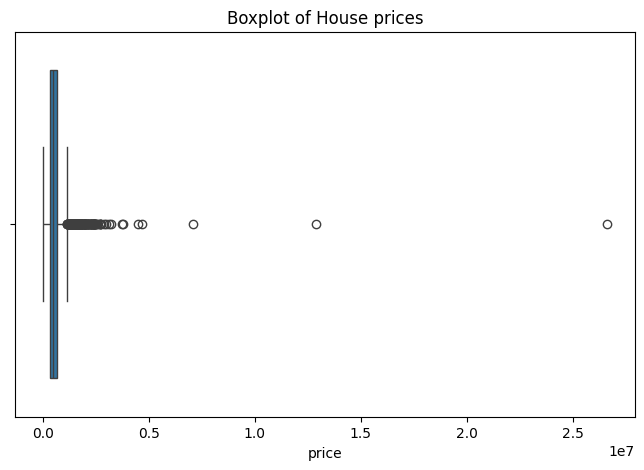

In [ ]:
# Boxplot - price distribution
def box_plot(df, cols):
  plt.figure(figsize = (8,5))
  sns.boxplot(x = df[cols])
  plt.title("Boxplot of House prices")
  plt.show()

box_plot(df, 'price')

**Percentile**

In [ ]:
# 99th percentile
import numpy as np
def percentile(df, cols):
  perc_99 = np.percentile(df[cols], 99)
  print(f'99th percentile price :{perc_99}')
  print(f"Max price: {df[cols].max()}")

percentile(df, 'price')

99th percentile price :2016000.0
Max price: 26590000.0


There are extreme outliers i.e., 13 times higher than 99th percentile; probably high-priced houses are heavily skewing the distribution

**3.2 Winsorization (Capping Outliers)**
<a id="winsorization"></a>


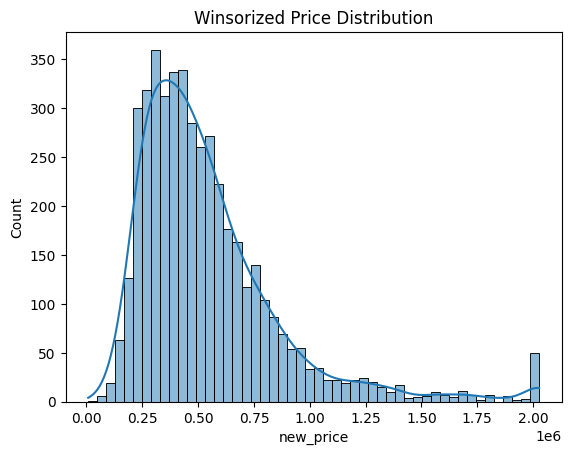

New Max Price: 2027000.0
New Skewness: 2.0234164222780016


In [ ]:
from scipy.stats.mstats import winsorize

def winsorization(df, cols):
  # capping top 1% of extreme values
  df['new_price'] = winsorize(df['price'], limits = [0, 0.01])
winsorization(df, 'price')

def new_plot(df, cols):
  # plotting new  distribution
  sns.histplot(df['new_price'], bins = 50, kde = True)
  plt.title('Winsorized Price Distribution')
  plt.show()

  # checking new max price
  print(f"New Max Price: {df['new_price'].max()}")

  #checking new skewness
  print(f"New Skewness: {df['new_price'].skew()}")

new_plot(df, 'new_price')

After capping, **skewness** went from **25.02 -> 2.02**. Ideally it should be (<2)
It means we **successfully reduced the impact of extreme outliers**. We brought distribution closer to somewhat normal.
We didn't remove those high-priced rows, we just capped them, avoided loosing too much information while making our model more balanced.

**3.3 Data Transformation - Log Transformation** <a id="log-transformation"></a>
- Applying log transformation for normality especially for positive values helps normalize the data.
- To **change distribution** to **reduce data skewness**

1. **Log transformation : wide range of values**
2. Sq. root transformation: moderate skewness
3. Box-Cox: +ve data
4. Yeo-Johnson: flexible for all datatypes
5. Reciprocal Transformation: not suitable for zero values




In [ ]:
def log_transformation(df, cols):
  df[f"{cols}_log"] = np.log1p(df[cols])
  print(f"Skewness after transformation: {df[f'{cols}_log'].skew()}")
  return df

log_transformation(df, 'new_price')
# before capping -> skew : 0.3299944486716577 -> significant decrease in skewness

Skewness after transformation: 0.09235554775501385


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,new_price,new_price_log
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,3.130000e+05,12.653962
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2.027000e+06,14.522068
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,3.420000e+05,12.742569
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,4.200000e+05,12.948012
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5.500000e+05,13.217675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,3.081667e+05,12.638399
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,5.343333e+05,13.188777
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,4.169042e+05,12.940614
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2.034000e+05,12.222935


Yes! Now your **skew is ~0**, previously extreme prices dominated the model, now prices are evenly spreaded and making feature relationships clearer. Also, if new high-priced houses appear, their impact will be controlled by **log-scaling.**

# **4. Feature Engineering** <a id="feature-engineering"></a>

**4.1 Dropping Unnecessary Columns** <a id="dropping-columns"></a>

This extracts meaningful information from dataset. Steps:
1. **Drop unnecessary columns** or perform encoding (one-hot encoding and label encoding)
2. Extract new features
3. Encode categorical variables
4. Handle correlated features

In [ ]:
# dropping due to high cardinality

def drop_cols(df,cols):
  df.drop(columns = cols, inplace = True)
  print('Updated dataset shape:', df.shape)
  return df

drop_cols(df, ['street', 'city', 'statezip', 'country', 'price', 'new_price'])

Updated dataset shape: (4551, 14)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,new_price_log
0,2014-05-02,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,12.653962
1,2014-05-02,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,14.522068
2,2014-05-02,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,12.742569
3,2014-05-02,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,12.948012
4,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,13.217675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,12.638399
4596,2014-07-09,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,13.188777
4597,2014-07-09,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,12.940614
4598,2014-07-10,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,12.222935


**4.2 Extracting New Features** <a id="extracting-features"></a>

In [ ]:
# yr_built + yr_reonvated -> prop_age

from datetime import datetime

def cal_age(df):
  df['prop_age'] = datetime.now().year - df['yr_built']
  df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
  df.drop(columns = ['yr_built', 'yr_renovated'], inplace = True)
  print('Updated Dataset shape', df.shape)
  return df

cal_age(df)

Updated Dataset shape (4551, 14)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,new_price_log,prop_age,is_renovated
0,2014-05-02,3,1.50,1340,7912,1.5,0,0,3,1340,0,12.653962,70,1
1,2014-05-02,5,2.50,3650,9050,2.0,0,4,5,3370,280,14.522068,104,0
2,2014-05-02,3,2.00,1930,11947,1.0,0,0,4,1930,0,12.742569,59,0
3,2014-05-02,3,2.25,2000,8030,1.0,0,0,4,1000,1000,12.948012,62,0
4,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,1140,800,13.217675,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3,1.75,1510,6360,1.0,0,0,4,1510,0,12.638399,71,1
4596,2014-07-09,3,2.50,1460,7573,2.0,0,0,3,1460,0,13.188777,42,1
4597,2014-07-09,3,2.50,3010,7014,2.0,0,0,3,3010,0,12.940614,16,0
4598,2014-07-10,4,2.00,2090,6630,1.0,0,0,3,1070,1020,12.222935,51,0


In [ ]:
def date_extract(df, date_col):
  df['year_sold'] = pd.to_datetime(df[date_col]).dt.year
  df['month_sold'] = pd.to_datetime(df[date_col]).dt.month
  df.drop(date_col, axis=1, inplace=True)
  return df

date_extract(df, 'date')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,new_price_log,prop_age,is_renovated,year_sold,month_sold
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,12.653962,70,1,2014,5
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,14.522068,104,0,2014,5
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,12.742569,59,0,2014,5
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,12.948012,62,0,2014,5
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,13.217675,49,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,6360,1.0,0,0,4,1510,0,12.638399,71,1,2014,7
4596,3,2.50,1460,7573,2.0,0,0,3,1460,0,13.188777,42,1,2014,7
4597,3,2.50,3010,7014,2.0,0,0,3,3010,0,12.940614,16,0,2014,7
4598,4,2.00,2090,6630,1.0,0,0,3,1070,1020,12.222935,51,0,2014,7


**4.3 One-Hot Encoding** <a id="one-hot-encoding"></a>

Now, we have created new features since we it would be helpful if we know the age of the house but not its built-year. Similarly, if a house is renovated or not will give extra insight (Yes/No). So, converted all these values >0 -> 1 else 0

**Encoding categorical features**
(for Low_cardinality)
1. **One-hot encoding: each value converted to a separate col and 1 -> value which is in original data; 0-> value not in origial data**
2. Label encoding: assigning unique integer to each category (ordinal)
3. Binary encoding: categoris -> binary nos. -> split into seperate columns (high-cardinality)
4. Target encoding: replaces categories -> mean of target variable
5. Frequency encoding: replaces categories ->frequency in the dataset (high cardinality)
6. Hash encoding: uses hash function to convert categories -> fixed no. of columns (high cardinality)
7. TF-IDF: NLP

# **6. Hypothesis Testing <a id="hypothesis-testing"></a>**

**What features (columns) help us best explain the price of a house?**

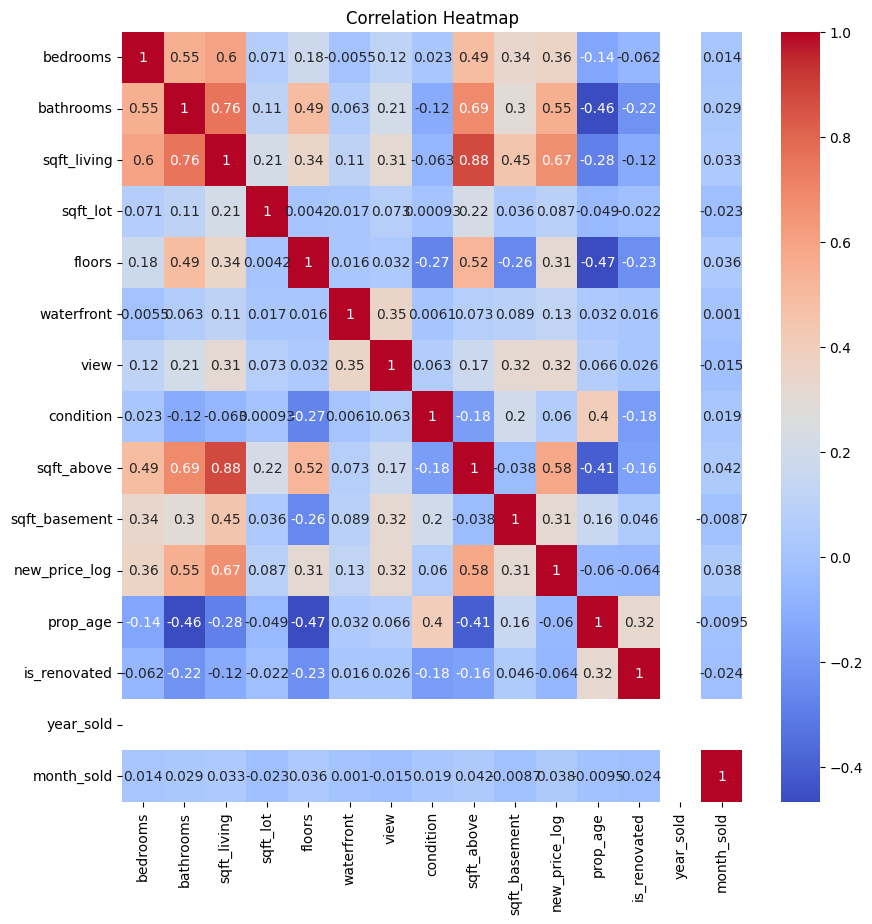

In [ ]:
def correlation_map(df):
  plt.figure(figsize=(10,10))
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
  plt.title("Correlation Heatmap")
  plt.show()
correlation_map(df)

In [ ]:
import statsmodels.api as sm

def run_ols_and_get_significant_features(df, target_col='new_price_log'):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Add constant for intercept
    X_const = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X_const).fit()
    print(model.summary())

    # Extract p-values and coefficients
    summary_df = model.summary2().tables[1]

    # Keep only significant features (p < 0.05)
    significant = summary_df[summary_df['P>|t|'] < 0.05]
    significant_features = significant.index.tolist()

    # Remove constant if present
    if 'const' in significant_features:
        significant_features.remove('const')

    print("\n Significant features (p < 0.05):")
    print(significant_features)

    return significant_features, model

significant_features, model = run_ols_and_get_significant_features(df)

                            OLS Regression Results                            
Dep. Variable:          new_price_log   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     409.5
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:50:01   Log-Likelihood:                -1904.0
No. Observations:                4551   AIC:                             3834.
Df Residuals:                    4538   BIC:                             3918.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0525      0.008     -6.706

**Refit model using only significant features**

In [ ]:
X_sig = sm.add_constant(df[significant_features])
y = df['new_price_log']
model_sig = sm.OLS(y, X_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:          new_price_log   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     491.1
Date:                Thu, 17 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:39:33   Log-Likelihood:                -1905.2
No. Observations:                4551   AIC:                             3832.
Df Residuals:                    4540   BIC:                             3903.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0531      0.008     -6.797

**Checking for Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant again for VIF check
X_vif = sm.add_constant(df[significant_features])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data)

          Feature        VIF
0        bedrooms   1.676394
1       bathrooms   3.264259
2     sqft_living        inf
3        sqft_lot   1.075637
4          floors   1.876260
5            view   1.191538
6       condition   1.430426
7      sqft_above        inf
8   sqft_basement        inf
9        prop_age   1.898894
10   is_renovated   1.314590
11      year_sold  68.441058


# **7. Feature Scaling <a id="feature-scaling"></a>**

We need this step, since bedrooms-> 2,3,4 and sqft_living-> thousands. Also, Linear models are senisitive to scale differences. It adjusts range of values without changing their distribution.

1. **Standardization (Z-score)** -> scaling b/w mean = 0 and SD = 1; when you are assuming Normal distribution. Eg: Linear Regression
2. Normalization (Min-max scaling) -> scaling in the range of (0,1); when you are not assuming any distribution. Eg: KNN

**7.1 Standard Scaling** <a id="standard-scaling"></a>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select X and y
X = df.drop(columns=['new_price_log', 'sqft_above', 'sqft_basement'])
y = df['new_price_log']

# Standard scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **8. Data Split** <a id="data-split"></a>

**8.1 Train-Test Data Split** <a id="train-test-split"></a>
- Splitting data into training and testing sets (80-20).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **9. Regression Model** <a id="ml-model"></a>

**9.1 Linear Regression Model** <a id="linear-regression"></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Get the R² score for both train and test data
lin_reg_train_r2 = lin_reg.score(X_train, y_train)
lin_reg_test_r2 = lin_reg.score(X_test, y_test)

print(f"Linear Regression R² Train: {lin_reg_train_r2:.4f}")
print(f"Linear Regression R² Test: {lin_reg_test_r2:.4f}")

Linear Regression R² Train: 0.5341
Linear Regression R² Test: 0.4564


# **10. Regularization Techniques** <a id="ml-model"></a>

**10.1 Ridge (L2) Regression Model** <a id="linear-regression"></a>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_train_r2 = ridge.score(X_train, y_train)
ridge_test_r2 = ridge.score(X_test, y_test)

print(f"Ridge R² Train: {ridge_train_r2:.4f}")
print(f"Ridge R² Test: {ridge_test_r2:.4f}")

Ridge R² Train: 0.5341
Ridge R² Test: 0.4564


**10.2 Lasso (L1) Regression Model** <a id="linear-regression"></a>

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_train_r2 = lasso.score(X_train, y_train)
lasso_test_r2 = lasso.score(X_test, y_test)

print(f"Lasso R² Train: {lasso_train_r2:.4f}")
print(f"Lasso R² Test: {lasso_test_r2:.4f}")

Lasso R² Train: 0.4152
Lasso R² Test: 0.4152


**10.3 Elastic Network Regression Model** <a id="linear-regression"></a>

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

elastic_train_r2 = elastic.score(X_train, y_train)
elastic_test_r2 = elastic.score(X_test, y_test)

print(f"ElasticNet R² Train: {elastic_train_r2:.4f}")
print(f"ElasticNet R² Test: {elastic_test_r2:.4f}")

ElasticNet R² Train: 0.4703
ElasticNet R² Test: 0.4525


# **11. Evaluation metrics** <a id="ml-model"></a>

**11.1 Model Evaluation (MSE, R², Adjusted R²)** <a id="model-evaluation"></a>

To check how well the model predicts house prices:

1. **MSE**: penalizes large errors more than small ones.
2. **R^2**: High R^2, better fit
3. **Adjusted R^2**: penalizes unnecessary predictors
4. MAE: treats all errors equally; better than MSE; non-differentiable; cannot optimize this using gradient-descent
5. RMSE: gives **more weight to large errors**, useful when large errors are critical; gives in same units as dependent variable. Eg: Weather forecasting, financial models

In [ ]:
import pandas as pd

# Initialize models
models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']
train_r2 = [lin_reg_train_r2, lasso_train_r2, ridge_train_r2, elastic_train_r2]
test_r2 = [lin_reg_test_r2, lasso_test_r2, ridge_test_r2, elastic_test_r2]

# Create a DataFrame to tabulate the results
results_df = pd.DataFrame({
    'Model': models,
    'Train R²': train_r2,
    'Test R²': test_r2
})

# Print the results
print(results_df)

               Model  Train R²   Test R²
0  Linear Regression  0.534111  0.456361
1              Lasso  0.415157  0.415165
2              Ridge  0.534111  0.456414
3         ElasticNet  0.470330  0.452496


# 12. Cross-Validation <a id="regularization"></a>

This ensures model is **trained and tested on different subsets multiple times**, unlike single train-test split which can be biased by data selection.

1. **K-Fold Cross-Validation** Balanced dataset, general modeling?
2. Stratified K-Fold: Imbalanced classes? (suitable for "Classification")
3. Leave-One-Out CV: Small dataset?
4. Leave-P-Out CV
5. Time Series CV (Rolling/Expanding window): time series CV oo chronological dependency
6. Repeated K-Fold: if there is "high variance" in model results

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Evaluate with 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = {
        'Mean CV R²': np.mean(scores),
        'Std CV R²': np.std(scores)
    }

# Tabulate results
cv_df = pd.DataFrame(cv_results).T.reset_index().rename(columns={'index': 'Model'})
print(cv_df)

               Model  Mean CV R²  Std CV R²
0  Linear Regression    0.529265   0.022035
1              Lasso   -0.000287   0.000350
2              Ridge    0.529270   0.022025
3         ElasticNet    0.468937   0.023978


# **13. Check your House Price here**

In [ ]:
import pandas as pd

feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
 'view', 'condition', 'prop_age', 'is_renovated', 'year_sold', 'month_sold']

X_train_df = pd.DataFrame(X_train, columns = feature_names)

In [ ]:
new_data = pd.DataFrame([[3, 2, 1800, 5000, 1, 0, 1, 3, 25, 0, 2023, 1]])

**Ridge Regression**

In [ ]:
prediction = ridge.predict(new_data)
new_data_scaled = scaler.transform(new_data)
prediction_ridge = ridge.predict(new_data_scaled)
print(f"Predicted house price: {prediction_ridge[0]:.2f}")

Predicted house price: $12.72
